In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras import datasets, utils, layers, models, optimizers
import numpy as np
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()
xtrain = xtrain.reshape(60000, 784) / 255
xtraindata = xtrain[0:1024]
print(xtraindata.shape)
# print(ytraindata.shape)
xtest = xtest.reshape(10000, 784) / 255
xtestdata = xtest[0:100]
ytrain = utils.to_categorical(ytrain, 10)
ytraindata = ytrain[0:1024]
ytest = utils.to_categorical(ytest, 10)
ytestdata = ytest[0:100]
print(ytrain)
inputs = layers.Input(shape=(784,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics =['accuracy'])
history = model.fit( xtraindata , ytraindata , batch_size = 32, epochs =10, validation_data =( xtestdata , ytestdata ))
score = model.evaluate ( xtestdata , ytestdata )
print ( 'Test loss : ' , score [0] , 'Test accuracy : ' , score [1])

11493376/11490434 [==============================] - 0s 0us/step
(1024, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/10
32/32 [==============================] - 0s 10ms/step - loss: 1.4788 - accuracy: 0.5381 - val_loss: 1.0134 - val_accuracy: 0.6400
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.8516 - val_loss: 0.5761 - val_accuracy: 0.7900
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.9170 - val_loss: 0.4230 - val_accuracy: 0.8500
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1465 - accuracy: 0.9531 - val_loss: 0.2843 - val_accuracy: 0.9200
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0815 - accuracy: 0.9756 - val_loss: 0.2543 - val_accuracy: 0.9300
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


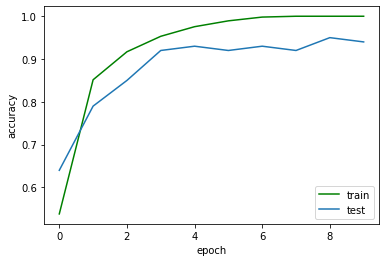

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
print(history.epoch)
plt.plot(history.epoch, history.history['accuracy'], 'g')
plt.plot(history.epoch,history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt . legend (['train' , 'test'] , loc= 'lower right')
plt.show()

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models,layers , optimizers , datasets , utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1024]
y_train= y_train[:1024]
x_test = x_test[:100]
y_test = y_test[:100]
x_train=x_train.reshape(1024,28,28,1)/255
x_test= x_test.reshape(100,28,28,1)/255
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

In [5]:
inputs = layers.Input(shape=(28,28,1,))
cnn = Conv2D(32 , kernel_size=(3,3) , activation='relu',padding='valid',input_shape=(28,28,1))(inputs)
cnn = Conv2D(64 , kernel_size=(3,3) , activation='relu')(cnn)
cnn = MaxPooling2D(pool_size=(2,2))(cnn)
cnn = Dropout(0.25)(cnn)
cnn = Flatten()(cnn)
cnn= Dense(132,activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)
# cnn= Dense(256,activation='relu')(cnn)
# cnn =Dropout(0.5)(cnn)
outputs = Dense(10,activation='softmax')(cnn)
model =models.Model ( inputs = inputs ,outputs = outputs )

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history =model.fit(x_train,y_train,batch_size=32,epochs=12,verbose=1,validation_data=(x_test, y_test))
accuracy = model.evaluate(x_test,y_test,verbose=1,batch_size=32)
accuracy1 = model.evaluate(x_train,y_train,verbose=1,batch_size=32)
print("Loss",accuracy[0],"Accuracy",accuracy[1])
print("Loss",accuracy1[0],"Accuracy",accuracy1[1])

Epoch 1/12
32/32 [==============================] - 0s 11ms/step - loss: 1.3923 - accuracy: 0.5312 - val_loss: 0.6365 - val_accuracy: 0.7600
Epoch 2/12
32/32 [==============================] - 0s 6ms/step - loss: 0.6137 - accuracy: 0.8105 - val_loss: 0.3715 - val_accuracy: 0.8700
Epoch 3/12
32/32 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.8857 - val_loss: 0.2484 - val_accuracy: 0.9300
Epoch 4/12
32/32 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.9199 - val_loss: 0.1435 - val_accuracy: 0.9600
Epoch 5/12
32/32 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.9346 - val_loss: 0.1225 - val_accuracy: 0.9700
Epoch 6/12
32/32 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9570 - val_loss: 0.1035 - val_accuracy: 0.9700
Epoch 7/12
32/32 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.9668 - val_loss: 0.0826 - val_accuracy: 0.9700
Epoch 8/12
32/32 [=

Text(0, 0.5, 'accuracy')

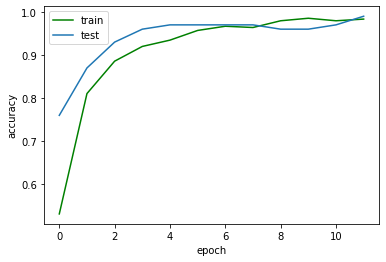

In [7]:
plt.plot(history.epoch,history.history["accuracy"],'g',label="train")
plt.plot(history.epoch,history.history["val_accuracy"],label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [10]:
import keras
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
 

In [11]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# Remove the last dense layer which has size=1000(prediction layer). 
# Freeze all layers except the dense layers for training.
# Add a last dense layer for 10 predictions
model = keras.models.Sequential()
for layer in vgg16.layers[:-1]:
  model.add(layer)
model.add(keras.layers.Dense(10, activation='softmax'))
for layer in model.layers[:-3]:
  layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Load MNIST data and preprocess it for VGG16
import keras
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, array_to_img
import tensorflow as tf
from scipy import ndimage
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1024, :, :]
y_train = y_train[:1024] 
x_test = x_train[:256, :, :]
y_test = y_train[:256] 
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test] * 3)
x_train = x_train.reshape(-1, 28,28,3)
x_test= x_test.reshape (-1, 28,28,3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_test])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train_RGB = preprocess_input(x_train)
x_test_RGB = preprocess_input(x_test)
x_train_RGB.shape, x_test.shape, y_train.shape, y_test.shape


((1024, 224, 224, 3), (256, 224, 224, 3), (1024, 10), (256, 10))

In [15]:
# Train the model
r = model.fit(x_train_RGB, y_train, validation_data=(x_test_RGB, y_test), epochs=20)

Epoch 1/20
32/32 [==============================] - 6s 187ms/step - loss: 10.3801 - accuracy: 0.5020 - val_loss: 0.3627 - val_accuracy: 0.8828
Epoch 2/20
32/32 [==============================] - 6s 185ms/step - loss: 0.2950 - accuracy: 0.9189 - val_loss: 0.0598 - val_accuracy: 0.9727
Epoch 3/20
32/32 [==============================] - 6s 188ms/step - loss: 0.1032 - accuracy: 0.9658 - val_loss: 0.0198 - val_accuracy: 0.9961
Epoch 4/20
32/32 [==============================] - 6s 191ms/step - loss: 0.0738 - accuracy: 0.9814 - val_loss: 0.1042 - val_accuracy: 0.9531
Epoch 5/20
32/32 [==============================] - 6s 189ms/step - loss: 0.0335 - accuracy: 0.9863 - val_loss: 0.0538 - val_accuracy: 0.9922
Epoch 6/20
32/32 [==============================] - 6s 185ms/step - loss: 0.0797 - accuracy: 0.9844 - val_loss: 0.0433 - val_accuracy: 0.9844
Epoch 7/20
32/32 [==============================] - 6s 182ms/step - loss: 0.0710 - accuracy: 0.9844 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch

In [16]:
scoreVGG = model.evaluate ( x_test_RGB , y_test )
print ( 'Test loss : ' , scoreVGG [0] , 'Test accuracy : ' , scoreVGG [1])

8/8 [==============================] - 1s 129ms/step - loss: 0.0381 - accuracy: 0.9961
Test loss :  0.0380910225212574 Test accuracy :  0.99609375


[0.501953125, 0.9189453125, 0.9658203125, 0.9814453125, 0.986328125, 0.984375, 0.984375, 0.9775390625, 0.9443359375, 0.94921875, 0.9619140625, 0.96484375, 0.9833984375, 0.9892578125, 0.99609375, 0.998046875, 0.9912109375, 0.9853515625, 0.9853515625, 0.9931640625]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


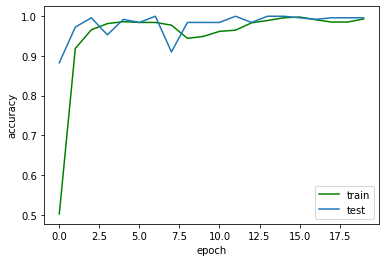

In [17]:
import matplotlib.pyplot as plt
print(r.history['accuracy'])
print(r.epoch)
plt.plot(r.epoch, r.history['accuracy'], 'g')
plt.plot(r.epoch,r.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt . legend (['train' , 'test'] , loc= 'lower right')
plt.show()